# **VISUALISASI BARPLOT DATA PUTUS SEKOLAH SD LAMPUNG SELATAN 2024**

# **123450012- Anggi Puspita Ningrum**
# **123450035- Fabiola Charissa Putri**
# **121450048- Muhammad Hanif Faros**
# **123450117- Nobel Nizam Fathirizki**

In [ ]:
# ============================================================================
# VISUALISASI BARPLOT DATA PUTUS SEKOLAH SD LAMPUNG SELATAN 2024
# ============================================================================

# Install dan load packages yang diperlukan
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("scales")) install.packages("scales")
if (!require("RColorBrewer")) install.packages("RColorBrewer")

library(ggplot2)
library(tidyverse)
library(gridExtra)
library(scales)
library(RColorBrewer)

# Baca data
data <- read.csv("/content/jumlah-putus-sekolah-menurut-jenis-kelamin-dan-status-sekolah-tiap-propinsi-kab-lampung-selatan-sd-2024.csv")

# Bersihkan nama kolom untuk memudahkan akses
colnames(data) <- c("Kecamatan", "L_Negeri", "L_Swasta", "L_Subjml",
                    "P_Negeri", "P_Swasta", "P_Subjml",
                    "Total_Negeri", "Total_Swasta", "Total_Jumlah")

# Tampilkan data
cat("=== DATA PUTUS SEKOLAH SD LAMPUNG SELATAN 2024 ===\n\n")
print(head(data))

=== DATA PUTUS SEKOLAH SD LAMPUNG SELATAN 2024 ===

             Kecamatan L_Negeri L_Swasta L_Subjml P_Negeri P_Swasta P_Subjml
1           Kec. Natar       16       16       32       20        9       29
2      Kec. Jati Agung        2        1        3        1        0        1
3 Kec. Tanjung Bintang        0        0        0        2        0        2
4        Kec. Katibung        7        0        7        4        1        5
5       Kec. Sidomulyo        0        0        0        4        0        4
6           Kec. Palas        2        0        2        2        0        2
  Total_Negeri Total_Swasta Total_Jumlah
1           36           25           61
2            3            1            4
3            2            0            2
4           11            1           12
5            4            0            4
6            4            0            4


# **BARPLOT TOTAL PER KECAMATAN (SORTED)**

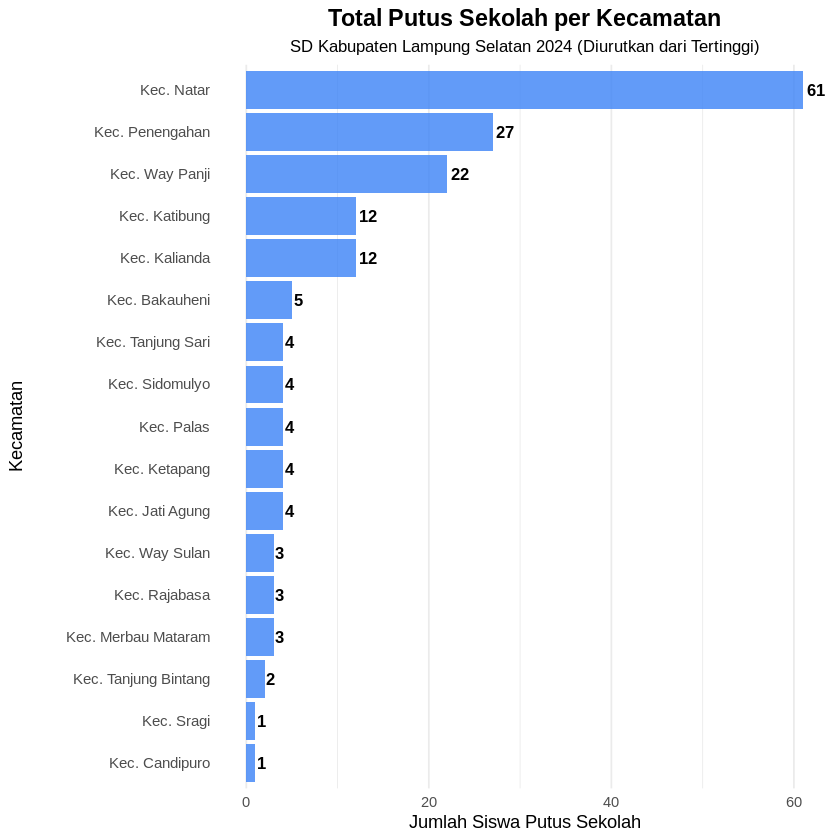

In [ ]:
# ============================================================================
# 1. BARPLOT TOTAL PER KECAMATAN (SORTED)
# ============================================================================

# Urutkan berdasarkan total putus sekolah
data_sorted <- data %>%
  arrange(desc(Total_Jumlah))

p1 <- ggplot(data_sorted, aes(x = reorder(Kecamatan, Total_Jumlah), y = Total_Jumlah)) +
  geom_bar(stat = "identity", fill = "#3b82f6", alpha = 0.8) +
  geom_text(aes(label = Total_Jumlah), hjust = -0.2, size = 3.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Total Putus Sekolah per Kecamatan",
       subtitle = "SD Kabupaten Lampung Selatan 2024 (Diurutkan dari Tertinggi)",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.y = element_text(size = 9),
        panel.grid.major.y = element_blank())

print(p1)

# **BARPLOT PERBANDINGAN LAKI-LAKI VS PEREMPUAN**

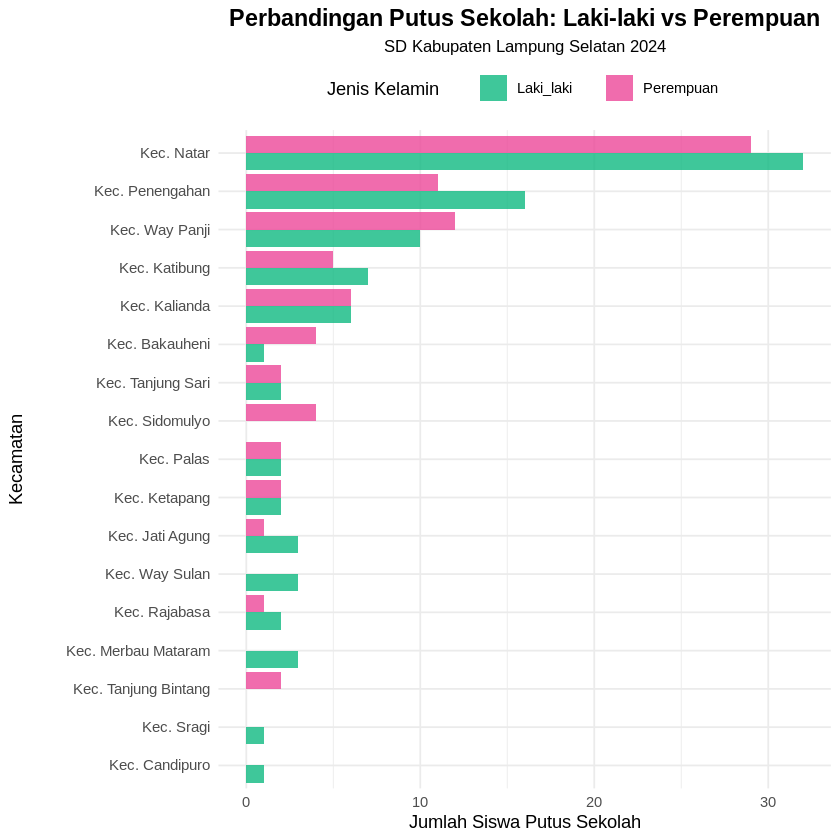

In [ ]:
# ============================================================================
# 2. BARPLOT PERBANDINGAN LAKI-LAKI VS PEREMPUAN
# ============================================================================

# Reshape data untuk jenis kelamin
data_gender <- data %>%
  select(Kecamatan, Laki_laki = L_Subjml, Perempuan = P_Subjml) %>%
  pivot_longer(cols = c(Laki_laki, Perempuan),
               names_to = "Jenis_Kelamin",
               values_to = "Jumlah")

p2 <- ggplot(data_gender, aes(x = reorder(Kecamatan, Jumlah), y = Jumlah, fill = Jenis_Kelamin)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  scale_fill_manual(values = c("Laki_laki" = "#10b981", "Perempuan" = "#ec4899")) +
  coord_flip() +
  labs(title = "Perbandingan Putus Sekolah: Laki-laki vs Perempuan",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah",
       fill = "Jenis Kelamin") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.y = element_text(size = 9),
        legend.position = "top")

print(p2)

# **STACKED BARPLOT - JENIS KELAMIN**

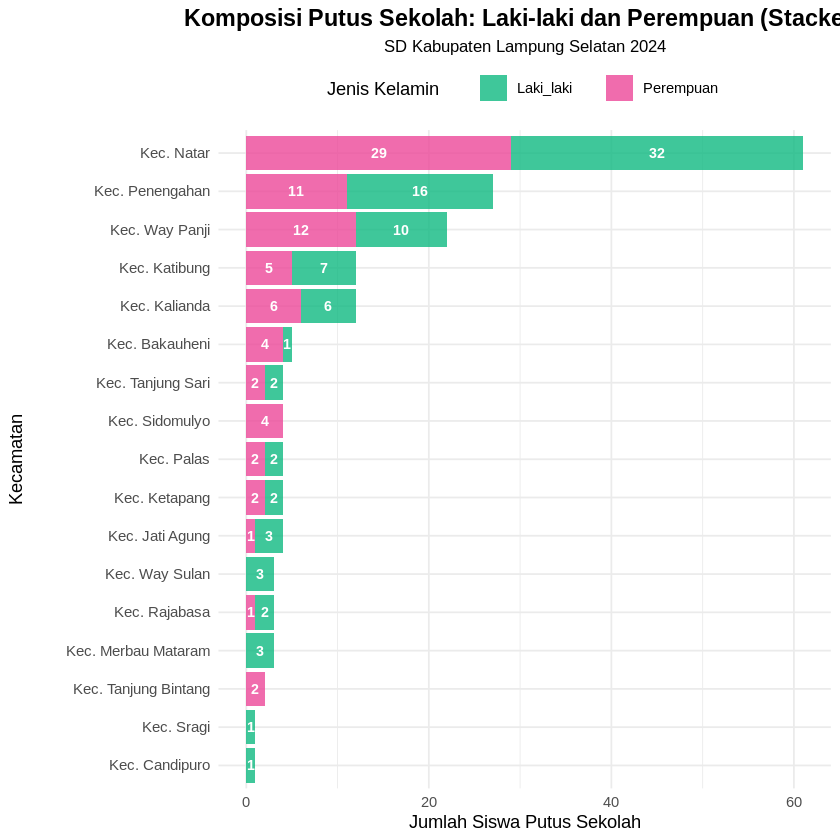

In [ ]:
# ============================================================================
# 3. STACKED BARPLOT - JENIS KELAMIN
# ============================================================================

p3 <- ggplot(data_gender, aes(x = reorder(Kecamatan, Jumlah), y = Jumlah, fill = Jenis_Kelamin)) +
  geom_bar(stat = "identity", position = "stack", alpha = 0.8) +
  geom_text(aes(label = ifelse(Jumlah > 0, Jumlah, "")),
            position = position_stack(vjust = 0.5),
            size = 3, color = "white", fontface = "bold") +
  scale_fill_manual(values = c("Laki_laki" = "#10b981", "Perempuan" = "#ec4899")) +
  coord_flip() +
  labs(title = "Komposisi Putus Sekolah: Laki-laki dan Perempuan (Stacked)",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah",
       fill = "Jenis Kelamin") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.y = element_text(size = 9),
        legend.position = "top")

print(p3)

# **BARPLOT PERBANDINGAN NEGERI VS SWASTA**

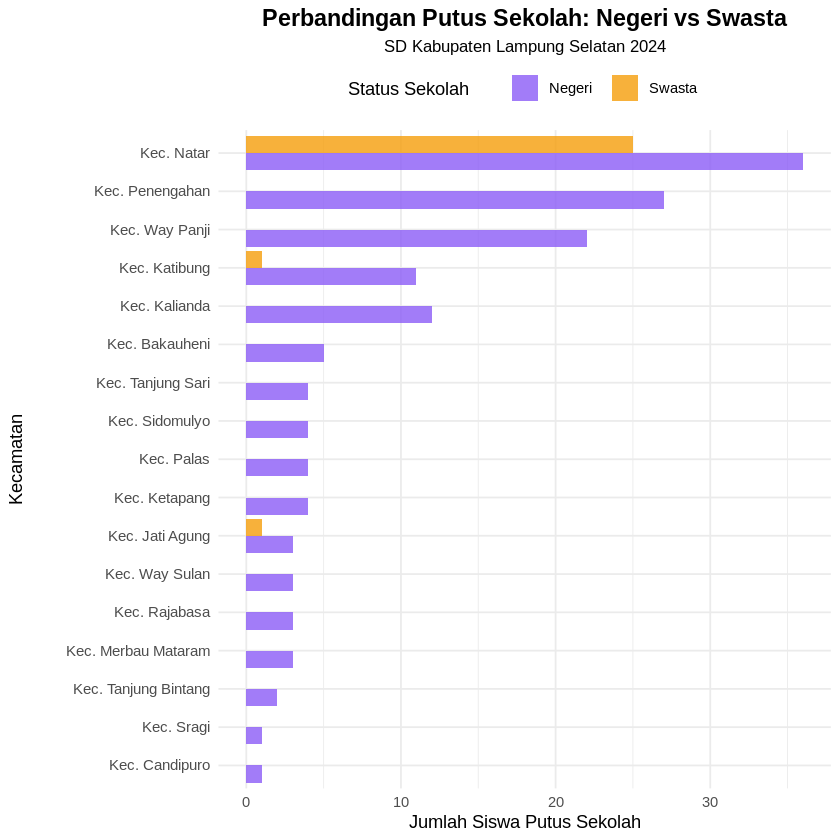

In [ ]:
# ============================================================================
# 4. BARPLOT PERBANDINGAN NEGERI VS SWASTA
# ============================================================================

# Reshape data untuk status sekolah
data_status <- data %>%
  select(Kecamatan, Negeri = Total_Negeri, Swasta = Total_Swasta) %>%
  pivot_longer(cols = c(Negeri, Swasta),
               names_to = "Status_Sekolah",
               values_to = "Jumlah")

p4 <- ggplot(data_status, aes(x = reorder(Kecamatan, Jumlah), y = Jumlah, fill = Status_Sekolah)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  scale_fill_manual(values = c("Negeri" = "#8b5cf6", "Swasta" = "#f59e0b")) +
  coord_flip() +
  labs(title = "Perbandingan Putus Sekolah: Negeri vs Swasta",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah",
       fill = "Status Sekolah") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.y = element_text(size = 9),
        legend.position = "top")

print(p4)

# **STACKED BARPLOT - STATUS SEKOLAH**

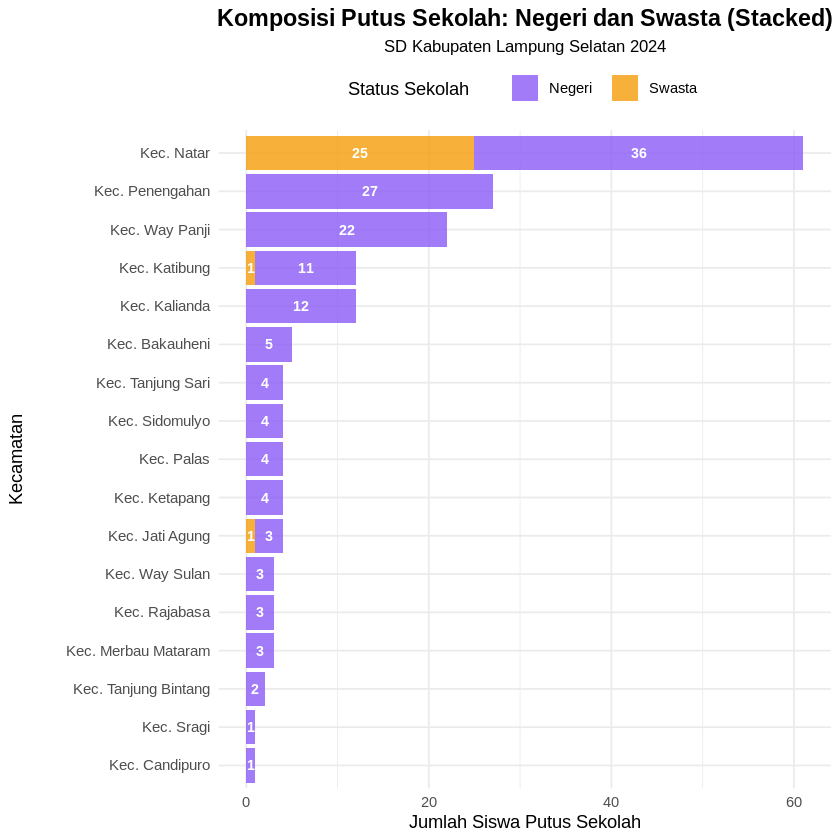

In [ ]:
# ============================================================================
# 5. STACKED BARPLOT - STATUS SEKOLAH
# ============================================================================

p5 <- ggplot(data_status, aes(x = reorder(Kecamatan, Jumlah), y = Jumlah, fill = Status_Sekolah)) +
  geom_bar(stat = "identity", position = "stack", alpha = 0.8) +
  geom_text(aes(label = ifelse(Jumlah > 0, Jumlah, "")),
            position = position_stack(vjust = 0.5),
            size = 3, color = "white", fontface = "bold") +
  scale_fill_manual(values = c("Negeri" = "#8b5cf6", "Swasta" = "#f59e0b")) +
  coord_flip() +
  labs(title = "Komposisi Putus Sekolah: Negeri dan Swasta (Stacked)",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah",
       fill = "Status Sekolah") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.y = element_text(size = 9),
        legend.position = "top")

print(p5)

# **BARPLOT KELOMPOK (GENDER + STATUS) PER KECAMATAN**

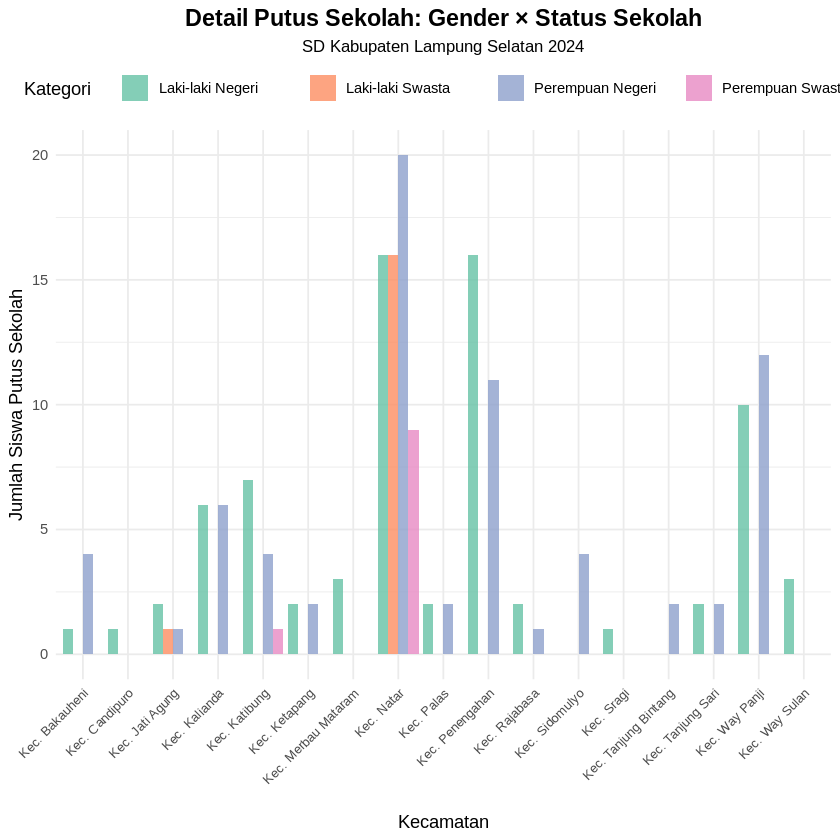

In [ ]:
# ============================================================================
# 6. BARPLOT KELOMPOK (GENDER + STATUS) PER KECAMATAN
# ============================================================================

# Reshape untuk kelompok lengkap
data_detail <- data %>%
  select(Kecamatan,
         `Laki-laki Negeri` = L_Negeri,
         `Laki-laki Swasta` = L_Swasta,
         `Perempuan Negeri` = P_Negeri,
         `Perempuan Swasta` = P_Swasta) %>%
  pivot_longer(cols = -Kecamatan,
               names_to = "Kategori",
               values_to = "Jumlah")

p6 <- ggplot(data_detail, aes(x = Kecamatan, y = Jumlah, fill = Kategori)) +
  geom_bar(stat = "identity", position = "dodge", alpha = 0.8) +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Detail Putus Sekolah: Gender × Status Sekolah",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah",
       fill = "Kategori") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
        legend.position = "top")

print(p6)

# **BARPLOT TOP 10 KECAMATAN**

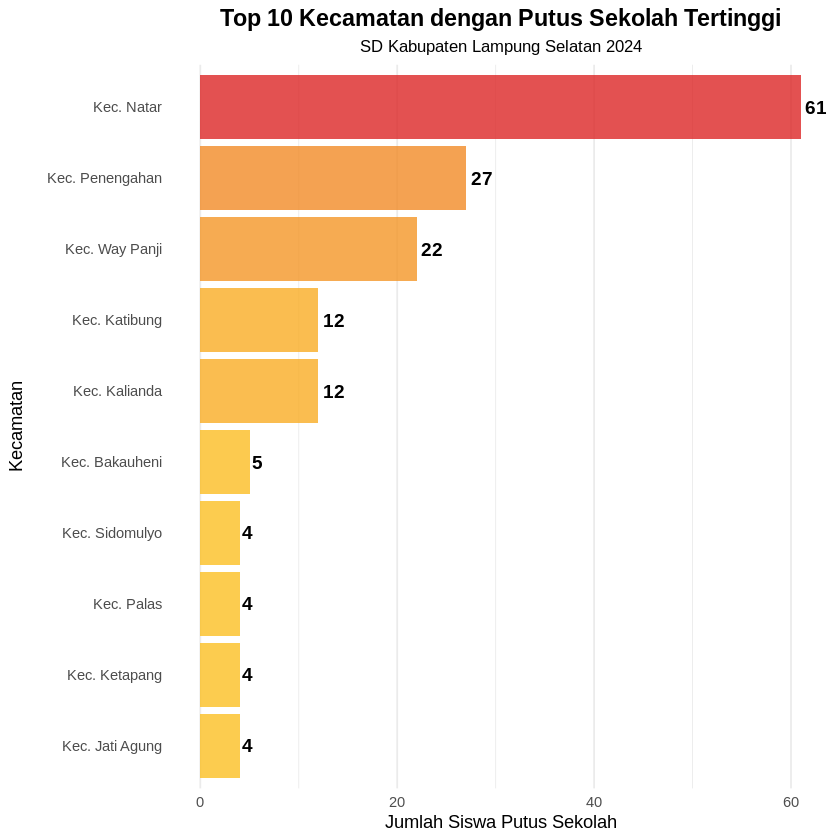

In [ ]:
# ============================================================================
# 7. BARPLOT TOP 10 KECAMATAN
# ============================================================================

top10 <- data %>%
  arrange(desc(Total_Jumlah)) %>%
  head(10)

p7 <- ggplot(top10, aes(x = reorder(Kecamatan, Total_Jumlah), y = Total_Jumlah)) +
  geom_bar(stat = "identity", aes(fill = Total_Jumlah), alpha = 0.8) +
  scale_fill_gradient(low = "#fbbf24", high = "#dc2626") +
  geom_text(aes(label = Total_Jumlah), hjust = -0.2, size = 4, fontface = "bold") +
  coord_flip() +
  labs(title = "Top 10 Kecamatan dengan Putus Sekolah Tertinggi",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Jumlah Siswa Putus Sekolah") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        legend.position = "none",
        panel.grid.major.y = element_blank())

print(p7)

# **BARPLOT AGREGAT - TOTAL PER KATEGORI**

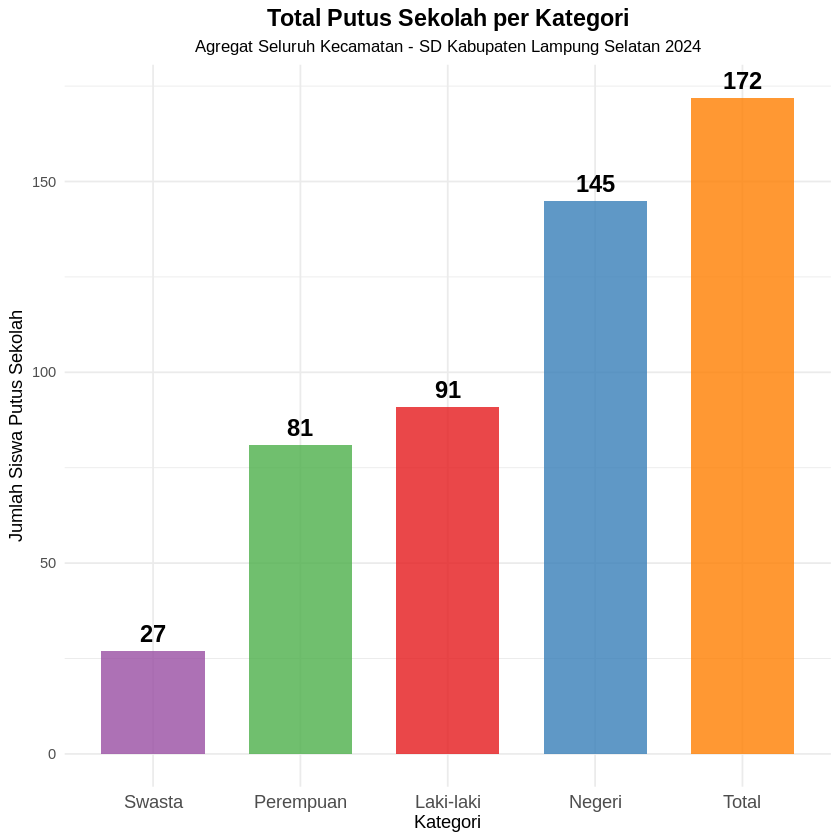

In [ ]:
# ============================================================================
# 8. BARPLOT AGREGAT - TOTAL PER KATEGORI
# ============================================================================

# Hitung total per kategori
total_kategori <- data.frame(
  Kategori = c("Laki-laki", "Perempuan", "Negeri", "Swasta", "Total"),
  Jumlah = c(sum(data$L_Subjml),
             sum(data$P_Subjml),
             sum(data$Total_Negeri),
             sum(data$Total_Swasta),
             sum(data$Total_Jumlah))
)

p8 <- ggplot(total_kategori, aes(x = reorder(Kategori, Jumlah), y = Jumlah, fill = Kategori)) +
  geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
  geom_text(aes(label = Jumlah), vjust = -0.5, size = 5, fontface = "bold") +
  scale_fill_brewer(palette = "Set1") +
  labs(title = "Total Putus Sekolah per Kategori",
       subtitle = "Agregat Seluruh Kecamatan - SD Kabupaten Lampung Selatan 2024",
       x = "Kategori",
       y = "Jumlah Siswa Putus Sekolah") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.x = element_text(size = 11),
        legend.position = "none")

print(p8)

# **BARPLOT PERSENTASE - KOMPOSISI GENDER**

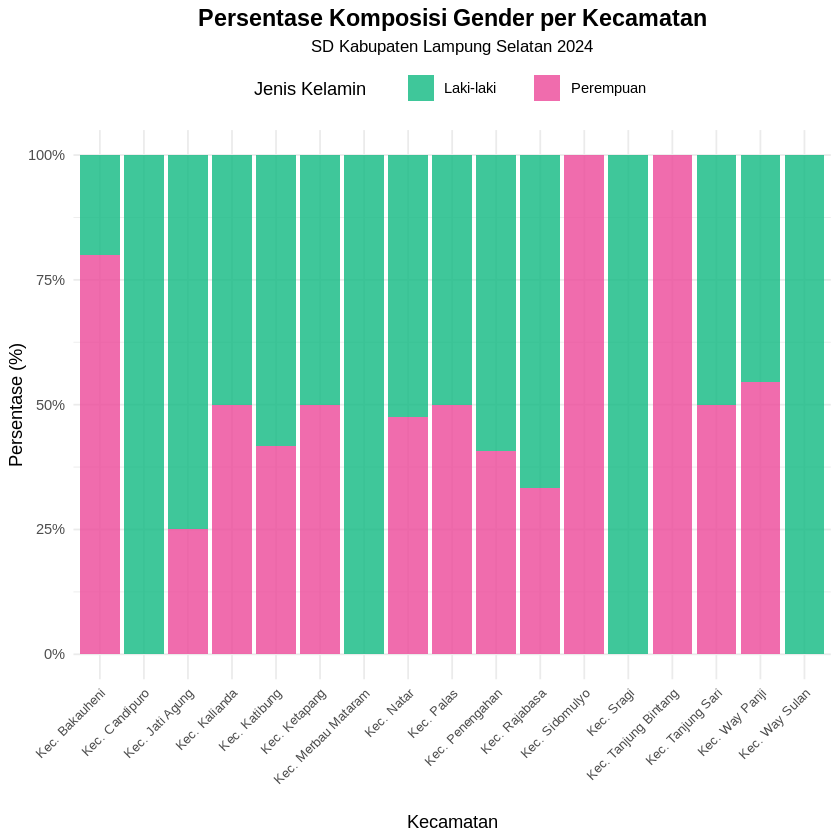

In [ ]:
# ============================================================================
# 9. BARPLOT PERSENTASE - KOMPOSISI GENDER
# ============================================================================

data_persen_gender <- data %>%
  mutate(Persen_Laki = (L_Subjml / Total_Jumlah) * 100,
         Persen_Perempuan = (P_Subjml / Total_Jumlah) * 100) %>%
  select(Kecamatan, `Laki-laki` = Persen_Laki, Perempuan = Persen_Perempuan) %>%
  pivot_longer(cols = -Kecamatan, names_to = "Gender", values_to = "Persentase")

p9 <- ggplot(data_persen_gender, aes(x = Kecamatan, y = Persentase, fill = Gender)) +
  geom_bar(stat = "identity", position = "fill", alpha = 0.8) +
  scale_y_continuous(labels = percent_format()) +
  scale_fill_manual(values = c("Laki-laki" = "#10b981", "Perempuan" = "#ec4899")) +
  labs(title = "Persentase Komposisi Gender per Kecamatan",
       subtitle = "SD Kabupaten Lampung Selatan 2024",
       x = "Kecamatan",
       y = "Persentase (%)",
       fill = "Jenis Kelamin") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 10, hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
        legend.position = "top")

print(p9)

# **SIMPAN SEMUA PLOT**


✓ Semua visualisasi barplot berhasil disimpan!


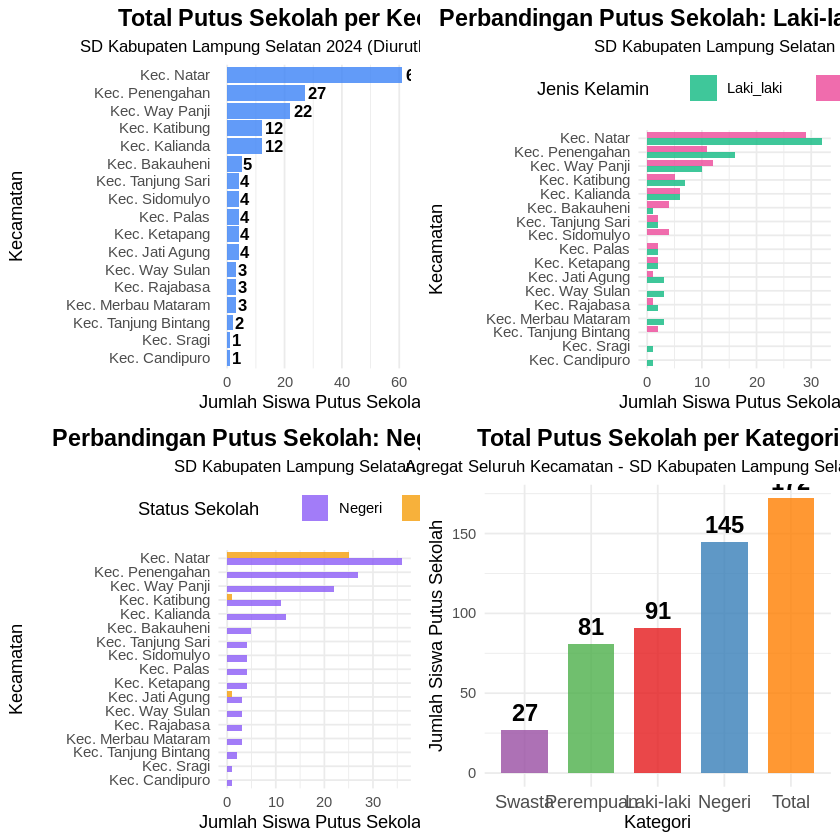

In [ ]:
# ============================================================================
# 10. SIMPAN SEMUA PLOT
# ============================================================================

# Simpan plot individual
ggsave("barplot_01_total_per_kecamatan.png", p1, width = 12, height = 8, dpi = 300)
ggsave("barplot_02_gender_dodge.png", p2, width = 12, height = 8, dpi = 300)
ggsave("barplot_03_gender_stacked.png", p3, width = 12, height = 8, dpi = 300)
ggsave("barplot_04_status_dodge.png", p4, width = 12, height = 8, dpi = 300)
ggsave("barplot_05_status_stacked.png", p5, width = 12, height = 8, dpi = 300)
ggsave("barplot_06_detail_kategori.png", p6, width = 14, height = 8, dpi = 300)
ggsave("barplot_07_top10.png", p7, width = 12, height = 8, dpi = 300)
ggsave("barplot_08_agregat_kategori.png", p8, width = 10, height = 7, dpi = 300)
ggsave("barplot_09_persentase_gender.png", p9, width = 12, height = 7, dpi = 300)

# Gabungkan plot utama
combined_plot <- grid.arrange(p1, p2, p4, p8, ncol = 2)
ggsave("barplot_combined_main.png", combined_plot, width = 16, height = 12, dpi = 300)

cat("\n✓ Semua visualisasi barplot berhasil disimpan!\n")


# **STATISTIK RINGKASAN**

In [ ]:
# ============================================================================
# 11. STATISTIK RINGKASAN
# ============================================================================

cat("\n=== RINGKASAN STATISTIK ===\n\n")

cat("Total Kecamatan:", nrow(data), "\n")
cat("Total Putus Sekolah:", sum(data$Total_Jumlah), "siswa\n")
cat("Rata-rata per Kecamatan:", round(mean(data$Total_Jumlah), 2), "siswa\n\n")

cat("GENDER:\n")
cat("- Laki-laki:", sum(data$L_Subjml), "siswa (",
    round(sum(data$L_Subjml)/sum(data$Total_Jumlah)*100, 2), "%)\n")
cat("- Perempuan:", sum(data$P_Subjml), "siswa (",
    round(sum(data$P_Subjml)/sum(data$Total_Jumlah)*100, 2), "%)\n\n")

cat("STATUS SEKOLAH:\n")
cat("- Negeri:", sum(data$Total_Negeri), "siswa (",
    round(sum(data$Total_Negeri)/sum(data$Total_Jumlah)*100, 2), "%)\n")
cat("- Swasta:", sum(data$Total_Swasta), "siswa (",
    round(sum(data$Total_Swasta)/sum(data$Total_Jumlah)*100, 2), "%)\n\n")

cat("TOP 5 KECAMATAN TERTINGGI:\n")
top5 <- data %>%
  arrange(desc(Total_Jumlah)) %>%
  head(5) %>%
  select(Kecamatan, Total = Total_Jumlah)
print(top5)

cat("\nBOTTOM 5 KECAMATAN TERENDAH:\n")
bottom5 <- data %>%
  arrange(Total_Jumlah) %>%
  head(5) %>%
  select(Kecamatan, Total = Total_Jumlah)
print(bottom5)

cat("\n✓ Analisis barplot selesai!\n")


=== RINGKASAN STATISTIK ===

Total Kecamatan: 17 
Total Putus Sekolah: 172 siswa
Rata-rata per Kecamatan: 10.12 siswa

GENDER:
- Laki-laki: 91 siswa ( 52.91 %)
- Perempuan: 81 siswa ( 47.09 %)

STATUS SEKOLAH:
- Negeri: 145 siswa ( 84.3 %)
- Swasta: 27 siswa ( 15.7 %)

TOP 5 KECAMATAN TERTINGGI:
        Kecamatan Total
1      Kec. Natar    61
2 Kec. Penengahan    27
3  Kec. Way Panji    22
4   Kec. Katibung    12
5   Kec. Kalianda    12

BOTTOM 5 KECAMATAN TERENDAH:
             Kecamatan Total
1       Kec. Candipuro     1
2           Kec. Sragi     1
3 Kec. Tanjung Bintang     2
4  Kec. Merbau Mataram     3
5        Kec. Rajabasa     3

✓ Analisis barplot selesai!
